In [ ]:
pip install tensorflow

In [ ]:
import tensorflow as tf
print(tf.__version__)
tf.executing_eagerly()

2.19.0


True

# Disabled eager execution

In [ ]:
tf.compat.v1.disable_eager_execution()

scalar=tf.constant(1, tf.int16, name='scalar') # rank or dimensions 0
vector=tf.constant([1,2,3], tf.int64,name='vecctor') #rank or dimensions 1
mat=tf.constant([[1,2,3],[4,5,6]], tf.int32, name='matrix') #rank or dimensions 2

print(vector.get_shape())
print(mat.shape)

tf.executing_eagerly()

(3,)
(2, 3)


False

In [ ]:
tf.executing_eagerly()

False

In [ ]:
# ENABLE EAGER EXECUTION

tf.compat.v1.enable_eager_execution() # cannot run this after disabling eager execution once in a notebook (restart runtime to execute this without disabling it)
tf.executing_eagerly()

ValueError: tf.enable_eager_execution must be called at program startup.

In [ ]:
m_shape= tf.constant([[11,10],[13,12],[15,14]])
print(m_shape.shape)

(3, 2)


In [ ]:
a=tf.constant(1, tf.int8, shape=[2,3], name='trial')
print(a)

with tf.compat.v1.Session() as sess: #this is required because disabling eager executing means it is in graph mode(need to create a session to execute tensors)
    tensor_value = sess.run(a)
    print("Tensor 'a' value:", tensor_value)
    print("\nTensor 'a' type:", type(tensor_value))

Tensor("trial_1:0", shape=(2, 3), dtype=int8)
Tensor 'a' value: [[1 1 1]
 [1 1 1]]

Tensor 'a' type: <class 'numpy.ndarray'>


In [ ]:
tf.compat.v1.reset_default_graph() # resets the tensorflow graph, resetting the existing built graphs (name suffix like _1,_2 of tensors gets reset to 0 if one tensor executed many times)
print(a)

Tensor("trial:0", shape=(2, 3), dtype=int8)


In [ ]:
tf.compat.v1.reset_default_graph() # use this for every new execution

decimal=tf.constant(12.34, tf.float16)
print(decimal)

alphabets=tf.constant('string', tf.string)
print(alphabets)


boolean=tf.constant([True, False], tf.bool)
print(boolean)

with tf.compat.v1.Session() as sess:
  print(sess.run(decimal))
  print(sess.run(alphabets))
  print(sess.run(boolean))

Tensor("Const:0", shape=(), dtype=float16)
Tensor("Const_1:0", shape=(), dtype=string)
Tensor("Const_2:0", shape=(2,), dtype=bool)
12.34
b'string'
[ True False]


In [ ]:
tf.compat.v1.reset_default_graph()

zeroes=tf.zeros([2,2], tf.int8)
print(zeroes)

ones=tf.ones([2,3,2], tf.float16) # for 3d, first index=no. of 2d matrix, second and third index=rows and columns
print(ones)

with tf.compat.v1.Session() as sess:
  print(sess.run(zeroes))
  print(sess.run(ones))



Tensor("zeros:0", shape=(2, 2), dtype=int8)
Tensor("ones:0", shape=(2, 3, 2), dtype=float16)
[[0 0]
 [0 0]]
[[[1. 1.]
  [1. 1.]
  [1. 1.]]

 [[1. 1.]
  [1. 1.]
  [1. 1.]]]


In [ ]:
tf.compat.v1.reset_default_graph()

a_float=tf.constant(1, tf.float16)
a_int=tf.cast(a_float, tf.int16)

print(a_float)
print(a_int)

with tf.compat.v1.Session() as sess:
  print(sess.run(a_float))
  print(sess.run(a_int))

Tensor("Const:0", shape=(), dtype=float16)
Tensor("Cast:0", shape=(), dtype=int16)
1.0
1


In [ ]:
import numpy as np

tf.compat.v1.reset_default_graph()

a=np.array([1,2,3,4])
b=tf.constant(a, tf.int16)

print(a)
print(b)

with tf.compat.v1.Session() as sess:
  print(sess.run(b))

[1 2 3 4]
Tensor("Const:0", shape=(4,), dtype=int16)
[1 2 3 4]


In [ ]:
tf.compat.v1.reset_default_graph()

var1=tf.compat.v1.Variable(0, name='var1')

assign_op=tf.compat.v1.assign(var1, 10)

with tf.compat.v1.Session() as sess:
    sess.run(tf.compat.v1.global_variables_initializer())
    sess.run(assign_op)
    print(sess.run(var1))

10


# Eager execution

In [ ]:
a=tf.constant([1,2,3,4,5,6])
print(a)

tf.Tensor([1 2 3 4 5 6], shape=(6,), dtype=int32)


In [ ]:
#slicing

a1=tf.slice(a, begin=[1], size=[3])
print("tensor sliced using tf.slice: ",a1)

a2=a[1:4]
print("tensor sliced using normal python syntax:",a2)

tensor sliced using tf.slice:  tf.Tensor([2 3 4], shape=(3,), dtype=int32)
tensor sliced using normal python syntax: tf.Tensor([2 3 4], shape=(3,), dtype=int32)


In [ ]:
t1=tf.constant([[1,2,3],[4,5,6],[7,8,9]])
print(t1)

tf.Tensor(
[[1 2 3]
 [4 5 6]
 [7 8 9]], shape=(3, 3), dtype=int32)


In [ ]:
t1_first_row=tf.slice(t1, begin=[0,0], size=[1,3])
print("first row sliced: ",t1_first_row)

t1_first_column=tf.slice(t1,begin=[0,0], size=[3,1])
print("\nfirst column sliced:",t1_first_column)

t1_two_rows=tf.slice(t1, begin=[1,0], size=[2,3])
print("\ntwo rows sliced:", t1_two_rows)

t1_two_columns=tf.slice(t1, begin=[0,1], size=[3,2])
print("\ntwo columns sliced:",t1_two_columns)

first row sliced:  tf.Tensor([[1 2 3]], shape=(1, 3), dtype=int32)

first column sliced: tf.Tensor(
[[1]
 [4]
 [7]], shape=(3, 1), dtype=int32)

two rows sliced: tf.Tensor(
[[4 5 6]
 [7 8 9]], shape=(2, 3), dtype=int32)

two columns sliced: tf.Tensor(
[[2 3]
 [5 6]
 [8 9]], shape=(3, 2), dtype=int32)


In [ ]:
#indexing
b=tf.constant([1,2,3,4,5,6])
print(b)

tf.Tensor([1 2 3 4 5 6], shape=(6,), dtype=int32)


In [ ]:
b1=tf.gather(b,indices=[1,3,4,5])
print(b1)

tf.Tensor([2 4 5 6], shape=(4,), dtype=int32)


In [ ]:
t2=tf.constant([[1,2,3],[4,5,6],[7,8,9]])
print(t2)

tf.Tensor(
[[1 2 3]
 [4 5 6]
 [7 8 9]], shape=(3, 3), dtype=int32)


In [ ]:
t2_first_row=tf.gather(t2, indices=[0], axis=0)
print("first row:", t2_first_row)

t2_first_column=tf.gather(t2, indices=[0], axis=1)
print("\nfirst column:", t2_first_column)

t2_first_two_rows=tf.gather(t2, indices=[0,1], axis=0)
print("\nfirst two rows:", t2_first_two_rows)

t2_first_two_columns=tf.gather(t2, indices=[0,1], axis=1)
print("\nfirst two columns:", t2_first_two_columns)

first row: tf.Tensor([[1 2 3]], shape=(1, 3), dtype=int32)

first column: tf.Tensor(
[[1]
 [4]
 [7]], shape=(3, 1), dtype=int32)

first two rows: tf.Tensor(
[[1 2 3]
 [4 5 6]], shape=(2, 3), dtype=int32)

first two columns: tf.Tensor(
[[1 2]
 [4 5]
 [7 8]], shape=(3, 2), dtype=int32)


In [ ]:
t3=tf.constant([[[1,2,3],[4,5,6]],[[7,8,9],[10,11,12]],[[13,14,15],[16,17,18]]])
print(t3)

tf.Tensor(
[[[ 1  2  3]
  [ 4  5  6]]

 [[ 7  8  9]
  [10 11 12]]

 [[13 14 15]
  [16 17 18]]], shape=(3, 2, 3), dtype=int32)


In [ ]:
t3_first_element=tf.gather_nd(t3, indices=[0,0,0])
print("first element:", t3_first_element)

t3_first_matrix=tf.gather_nd(t3, indices=[0])
print("\nfirst matrix:", t3_first_matrix)

t3_two_matrices=tf.gather_nd(t3, indices=[[1],[2]])
print("\ntwo matrices:", t3_two_matrices)

t3_row_matrix=tf.gather_nd(t3, indices=[[1,0]])
print("\nrow of a matrix:", t3_row_matrix)

t3_column_matrix=tf.gather(t3[1], indices=[1], axis=1) #gather_nd is too complex, better to use gather with axis argument
print("\ncolumn of a matrix:", t3_column_matrix)

first element: tf.Tensor(1, shape=(), dtype=int32)

first matrix: tf.Tensor(
[[1 2 3]
 [4 5 6]], shape=(2, 3), dtype=int32)

two matrices: tf.Tensor(
[[[ 7  8  9]
  [10 11 12]]

 [[13 14 15]
  [16 17 18]]], shape=(2, 2, 3), dtype=int32)

row of a matrix: tf.Tensor([[7 8 9]], shape=(1, 3), dtype=int32)

column of a matrix: tf.Tensor(
[[ 8]
 [11]], shape=(2, 1), dtype=int32)


In [ ]:
t4=tf.zeros_like(tf.constant([0,0,0,0,0,0,0,0]))
print(t4)

tf.Tensor([0 0 0 0 0 0 0 0], shape=(8,), dtype=int32)


In [ ]:
t4_values_inserted=tf.scatter_nd(indices=[[0],[1],[5]], updates=[65,78,85], shape=[8])
print(t4)
print(t4_values_inserted)

tf.Tensor([0 0 0 0 0 0 0 0], shape=(8,), dtype=int32)
tf.Tensor([65 78  0  0  0 85  0  0], shape=(8,), dtype=int32)


In [ ]:
t5=tf.zeros(shape=(2,3))
print(t5)

tf.Tensor(
[[0. 0. 0.]
 [0. 0. 0.]], shape=(2, 3), dtype=float32)


In [ ]:
t5_values_inserted=tf.scatter_nd(indices=[[0,0],[1,2]], updates=[1,100], shape=t5.shape)
print(t5_values_inserted)

tf.Tensor(
[[  1   0   0]
 [  0   0 100]], shape=(2, 3), dtype=int32)


In [ ]:
t_2d=tf.constant([[1,2,3],[4,5,6]])
print("Original 2d tensor;",t_2d)

t_1d_reshaped=tf.reshape(t_2d, shape=[6])
print("\nreshaped tensor:", t_1d_reshaped)

Original 2d tensor; tf.Tensor(
[[1 2 3]
 [4 5 6]], shape=(2, 3), dtype=int32)

reshaped tensor: tf.Tensor([1 2 3 4 5 6], shape=(6,), dtype=int32)


In [ ]:
t_og=tf.constant([[1,2,3],[4,5,6]])
print("Original tensor:", t_og)

t_reshaped=tf.reshape(t_og, shape=[3,2])
print("\nAfter reshaping:",t_reshaped)

t_transposed=tf.transpose(t_og)
print("\nAfter transposing:",t_transposed)

Original tensor: tf.Tensor(
[[1 2 3]
 [4 5 6]], shape=(2, 3), dtype=int32)

After reshaping: tf.Tensor(
[[1 2]
 [3 4]
 [5 6]], shape=(3, 2), dtype=int32)

After transposing: tf.Tensor(
[[1 4]
 [2 5]
 [3 6]], shape=(3, 2), dtype=int32)


In [ ]:
t_og=tf.constant([[1,2,3],[4,5,6]])
print("Original tensor:", t_og)

t_reshaped=tf.reshape(t_og, shape=[-1])
print("\nAfter reshaping using [-1]:",t_reshaped)

Original tensor: tf.Tensor(
[[1 2 3]
 [4 5 6]], shape=(2, 3), dtype=int32)

After reshaping using [-1]: tf.Tensor([1 2 3 4 5 6], shape=(6,), dtype=int32)


In [ ]:
t1=tf.constant([[1,2,3],[4,5,6]])
t2=tf.constant([10,10,10])

t3=t1+t2
print(t3)

tf.Tensor(
[[11 12 13]
 [14 15 16]], shape=(2, 3), dtype=int32)


In [ ]:
t1 =tf. constant([[[10, 11],
                   [20, 20],
                   [30, 30]],

                 [ [40, 41],
                   [50, 50],
                   [60, 60]   ]])

t2= tf.constant([[1, 2, 3],
                 [4, 5, 6]])

broadcasted_t2 = tf.expand_dims(t2, axis=-1)

t3=broadcasted_t2+ t1
print(t3)

tf.Tensor(
[[[11 12]
  [22 22]
  [33 33]]

 [[44 45]
  [55 55]
  [66 66]]], shape=(2, 3, 2), dtype=int32)


In [ ]:
#ragged tensors

t_ragged=tf.ragged.constant([[1,2,3],[4],[5,6,7,8,9]])
print(t_ragged)

t_normal=tf.constant([[1,2,3],[4],[5,6,7,8,9]]) #throws error as it is not uniform
print(t_normal)

<tf.RaggedTensor [[1, 2, 3], [4], [5, 6, 7, 8, 9]]>


ValueError: Can't convert non-rectangular Python sequence to Tensor.

In [ ]:
words = [3, 1, 4, 1, 5, 9, 2]
row_ids = [0, 0, 0, 0, 2, 2, 3] # words and row_ids should have the same length

ragged_tensor = tf.RaggedTensor.from_value_rowids(values=words, value_rowids=row_ids)
print(ragged_tensor)

<tf.RaggedTensor [[3, 1, 4, 1], [], [5, 9], [2]]>


In [ ]:
values = tf.constant([1, 2, 3, 0, 4, 0, 5, 6])
row_lengths = tf.constant([2, 2, 2, 2])
from_row_lengths_ragged = tf.RaggedTensor.from_row_lengths(values, row_lengths)

print(from_row_lengths_ragged)

<tf.RaggedTensor [[1, 2],
 [3, 0],
 [4, 0],
 [5, 6]]>


In [ ]:
values = tf.constant([1, 2, 3, 0, 4, 0, 5, 6])
row_splits = tf.constant([0, 3, 4, 5, 8])
from_row_splits_ragged = tf.RaggedTensor.from_row_splits(values, row_splits)
print(from_row_splits_ragged)

<tf.RaggedTensor [[1, 2, 3], [0], [4], [0, 5, 6]]>


In [ ]:
t_rag1=tf.ragged.constant([1,2,3])
t_rag2=tf.ragged.constant([4,5,6])

added_rag=tf.add(t_rag1, t_rag2)
print(added_rag)

mean_rag=tf.reduce_mean(added_rag)
print(mean_rag)

concat_rag=tf.concat([t_rag1, t_rag2], axis=0)
print(concat_rag)

shape_rag=t_rag1.shape
print(shape_rag)

tf.Tensor([5 7 9], shape=(3,), dtype=int32)
tf.Tensor(7, shape=(), dtype=int32)
tf.Tensor([1 2 3 4 5 6], shape=(6,), dtype=int32)
(3,)


In [ ]:
#sparse teensors

values=tf.constant([100,50], dtype=tf.int64)
indices=tf.constant([[1,1],[4,4]], dtype=tf.int64)
dense_shape=tf.constant([7,7], dtype=tf.int64)

sparse_tensor=tf.SparseTensor(indices=indices, values=values, dense_shape=dense_shape)
print(sparse_tensor)

SparseTensor(indices=tf.Tensor(
[[1 1]
 [4 4]], shape=(2, 2), dtype=int64), values=tf.Tensor([100  50], shape=(2,), dtype=int64), dense_shape=tf.Tensor([7 7], shape=(2,), dtype=int64))


In [ ]:
t_dense=tf.constant([[1,0,0],[0,2,0],[0,0,3]])
t_sparse=tf.sparse.from_dense(t_dense)
print("Dense tensor:", t_dense)
print("\nSparse tensor:", t_sparse)

Dense tensor: tf.Tensor(
[[1 0 0]
 [0 2 0]
 [0 0 3]], shape=(3, 3), dtype=int32)

Sparse tensor: SparseTensor(indices=tf.Tensor(
[[0 0]
 [1 1]
 [2 2]], shape=(3, 2), dtype=int64), values=tf.Tensor([1 2 3], shape=(3,), dtype=int32), dense_shape=tf.Tensor([3 3], shape=(2,), dtype=int64))


In [ ]:
t_sparse1 = tf.sparse.SparseTensor(indices=[[0, 3], [2, 4]], values=[10, 20], dense_shape=[5, 5])
t_sparse2 = tf.sparse.SparseTensor(indices=[[1, 2], [4, 2]], values=[30, 40], dense_shape=[5, 5])

add=tf.sparse.add(t_sparse1, t_sparse2)
print(add)

SparseTensor(indices=tf.Tensor(
[[0 3]
 [1 2]
 [2 4]
 [4 2]], shape=(4, 2), dtype=int64), values=tf.Tensor([10 30 20 40], shape=(4,), dtype=int32), dense_shape=tf.Tensor([5 5], shape=(2,), dtype=int64))


In [ ]:
sparse_indices = tf.constant([[0, 2], [1, 0], [1, 2], [2, 1]], dtype=tf.int64)
sparse_values = tf.constant([1.0, 2.0, 3.0, 4.0], dtype=tf.float32)
sparse_shape = tf.constant([3, 3], dtype=tf.int64)

sparse_tensor = tf.sparse.SparseTensor(indices=sparse_indices, values=sparse_values, dense_shape=sparse_shape)

dense_tensor = tf.constant([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0], [7.0, 8.0, 9.0]], dtype=tf.float32)

matmul = tf.sparse.sparse_dense_matmul(sparse_tensor, dense_tensor)

print("Dense tensor:", dense_tensor)
print("\nSparse tensor:", sparse_tensor)
print("\nResult of matrix multiplication:", matmul)

Dense tensor: tf.Tensor(
[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]], shape=(3, 3), dtype=float32)

Sparse tensor: SparseTensor(indices=tf.Tensor(
[[0 2]
 [1 0]
 [1 2]
 [2 1]], shape=(4, 2), dtype=int64), values=tf.Tensor([1. 2. 3. 4.], shape=(4,), dtype=float32), dense_shape=tf.Tensor([3 3], shape=(2,), dtype=int64))

Result of matrix multiplication: tf.Tensor(
[[ 7.  8.  9.]
 [23. 28. 33.]
 [16. 20. 24.]], shape=(3, 3), dtype=float32)


In [ ]:
concat_sparse=tf.sparse.concat(sp_inputs=[t_sparse1, t_sparse2], axis=0)
print(concat_sparse)

SparseTensor(indices=tf.Tensor(
[[0 3]
 [2 4]
 [6 2]
 [9 2]], shape=(4, 2), dtype=int64), values=tf.Tensor([10 20 30 40], shape=(4,), dtype=int32), dense_shape=tf.Tensor([10  5], shape=(2,), dtype=int64))


In [ ]:
sparse_indices = tf.constant([[0, 1], [1, 0], [2, 2], [2, 3]], dtype=tf.int64)
sparse_values = tf.constant([7, 14, 12, 11], dtype=tf.int32)
sparse_shape = tf.constant([3, 4], dtype=tf.int64)

sparse_tensor = tf.sparse.SparseTensor(indices=sparse_indices, values=sparse_values, dense_shape=sparse_shape)


# Slice the sparse tensor
sliced_sparse_tensor = tf.sparse.slice(sparse_tensor, start=[0, 0], size=[2, 3])

# Print the sliced sparse tensor
print("Sliced sparsed tensor:",sliced_sparse_tensor)

Sliced sparsed tensor: SparseTensor(indices=tf.Tensor(
[[0 1]
 [1 0]], shape=(2, 2), dtype=int64), values=tf.Tensor([ 7 14], shape=(2,), dtype=int32), dense_shape=tf.Tensor([2 3], shape=(2,), dtype=int64))


In [ ]:
sparse_indices = tf.constant([[0, 1], [1, 0], [2, 2], [2, 3]], dtype=tf.int64)
sparse_values = tf.constant([21,11,13, 8], dtype=tf.int32)
sparse_shape = tf.constant([3, 4], dtype=tf.int64)

sparse_tensor = tf.sparse.SparseTensor(indices=sparse_indices, values=sparse_values, dense_shape=sparse_shape)

print("Original matrix:",sparse_tensor)
def elementwise_operation(value):
  return value*2

result=tf.sparse.map_values(elementwise_operation, sparse_tensor)
print(result)

Original matrix: SparseTensor(indices=tf.Tensor(
[[0 1]
 [1 0]
 [2 2]
 [2 3]], shape=(4, 2), dtype=int64), values=tf.Tensor([21 11 13  8], shape=(4,), dtype=int32), dense_shape=tf.Tensor([3 4], shape=(2,), dtype=int64))
SparseTensor(indices=tf.Tensor(
[[0 1]
 [1 0]
 [2 2]
 [2 3]], shape=(4, 2), dtype=int64), values=tf.Tensor([42 22 26 16], shape=(4,), dtype=int32), dense_shape=tf.Tensor([3 4], shape=(2,), dtype=int64))


# Keras

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import mnist, boston_housing
from tensorflow.keras.utils import to_categorical

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [4]:
model = Sequential([
    Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
model.compile(optimizer="Adamw", loss="categorical_crossentropy", metrics=["accuracy"])

In [ ]:
model.fit(x_train, y_train, batch_size=128, epochs=20, validation_data=(x_test, y_test))

In [7]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9852 - loss: 0.0714


[0.05715443566441536, 0.9872999787330627]

In [63]:
df=pd.read_csv("/content/winequality-red.csv")

df=df.drop_duplicates()

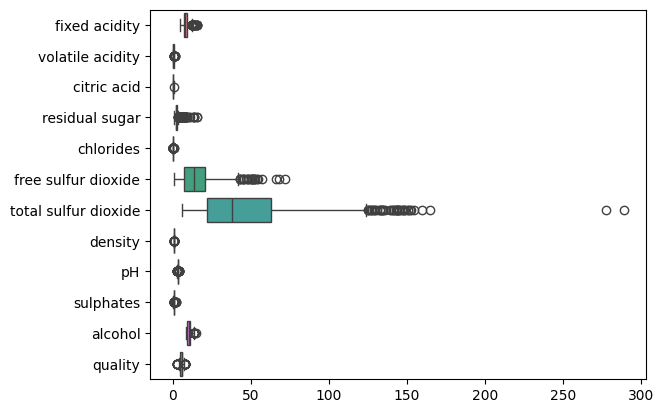

In [64]:
sns.boxplot(data=df, orient='h')
plt.show()

In [65]:
X=df.drop('quality', axis=1)
y=df['quality'].map({
    3:0,
    4:1,
    5:2,
    6:3,
    7:4,
    8:5
})

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=100, stratify=y)


low = X_train.quantile(0.01)
high = X_train.quantile(0.97)

X_train = X_train.clip(low, high, axis=1)
X_test = X_test.clip(low, high, axis=1)


scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

temp_df=pd.DataFrame(X_train, columns=X.columns)
input_shape=X_train.shape[1]
print(input_shape)
print(y.shape)

11
(1359,)


In [66]:
model=Sequential([
    Dense(32, activation='relu', input_shape=(input_shape,)),
    Dense(64, activation='relu'),
    Dense(128, activation='relu'),
    Dense(512, activation='relu'),
    Dense(6, activation='softmax')
])
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_27 (Dense)                │ (None, 32)             │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 512)            │        66,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 6)              │         3,078 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,942 (312.27 KB)

 Trainable params: 79,942 (312.27 KB)

 Non-trainable params: 0 (0.00 B)

In [69]:
model.compile(optimizer='adamw', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, batch_size=32, epochs=50, validation_data=(X_test, y_test))

In [71]:
model.evaluate(X_test, y_test)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5992 - loss: 2.2974 


[2.213740825653076, 0.591176450252533]

In [126]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df = pd.read_csv('housing.csv', header=None, delimiter=r"\s+", names=column_names)
df.head()
df.shape

(506, 14)

In [109]:
X=df.drop('MEDV', axis=1)
y=df['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=100)

scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [158]:
model=Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dense(1, activation='softplus')
])
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_79 (Dense)                │ (None, 32)             │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_80 (Dense)                │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_81 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_82 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,009 (43.00 KB)

 Trainable params: 11,009 (43.00 KB)

 Non-trainable params: 0 (0.00 B)

In [159]:
model.compile(optimizer='adamw', loss='mse', metrics=['R2Score'])

In [160]:
model.fit(X_train, y_train, batch_size=32, epochs=200, validation_data=(X_test, y_test))

Epoch 1/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 106ms/step - R2Score: -6.0532 - loss: 557.3728 - val_R2Score: -4.1481 - val_loss: 507.9775
Epoch 2/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - R2Score: -5.9633 - loss: 471.1522 - val_R2Score: -3.0390 - val_loss: 398.5469
Epoch 3/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - R2Score: -3.9371 - loss: 341.6259 - val_R2Score: -1.3302 - val_loss: 229.9267
Epoch 4/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - R2Score: -1.2698 - loss: 189.3095 - val_R2Score: -0.2670 - val_loss: 125.0174
Epoch 5/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - R2Score: -0.0999 - loss: 82.8607 - val_R2Score: 0.0771 - val_loss: 91.0684
Epoch 6/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - R2Score: 0.2310 - loss: 66.2006 - val_R2Score: 0.3333 - val_loss: 65.7901
Epoch 7/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - R2Score: 0.4183 - loss: 40.4364 - val_R2Score: 0.4770 - val_loss: 51.6099
Epoch 8/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - R2Score: 0.5008 - loss: 36.4839 

In [161]:
model.evaluate(X_test, y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - R2Score: 0.9008 - loss: 8.6965


[10.614786148071289, 0.8924251198768616]

Text(0.5, 1.0, 'Testing loss')

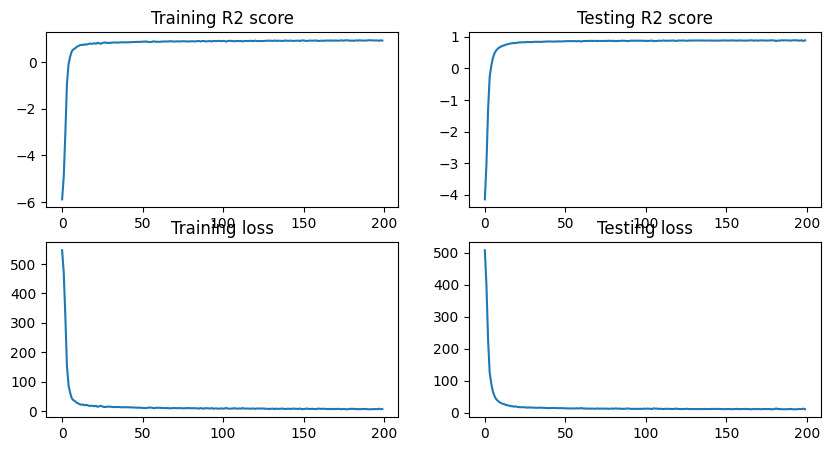

In [170]:
hist=model.history.history
plt.figure(figsize=(10,5))

plt.subplot(2,2,1)
sns.lineplot(hist['R2Score'])
plt.title("Training R2 score")


plt.subplot(2,2,2)
sns.lineplot(hist['val_R2Score'])
plt.title("Testing R2 score")


plt.subplot(2,2,3)
sns.lineplot(hist['loss'])
plt.title("Training loss")


plt.subplot(2,2,4)
sns.lineplot(hist['val_loss'])
plt.title("Testing loss")